# Lista 04 - Teste de Hipótese

In [26]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [27]:
np.random.seed(2019104)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [28]:
def q1a():
    return [ True, False, True ]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance.

In [29]:
def tvd(p, q):
    return np.sum(np.abs(p - q)) / 2

In [30]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [31]:
def q1c():
    # Define as distribuicoes de probabilidade
    pop = np.array([2000, 8000, 2500])/12500 # Populacao
    sample = np.array([100, 600, 300])/1000 # Amostra
    
    return tvd(pop, sample)
q1c()

0.1

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def q1d(tamanho_amostra, proporcoes):
    return [0.078, 0.0, 0.302]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

In [32]:
def gera_amostra(tamanho_amostra):
    # Cria uma lista para a populacao
    sample = []
    for i in range(0, 2000): sample.append(0)
    for i in range(0, 8000): sample.append(1)
    for i in range(0, 2500): sample.append(2)
        
    # Embaralha os dados da populacao
    np.random.shuffle(sample)
    
    # Isola os <tamanho_amostra> primeiros elementos desta populacao obtida
    sample = sample[0:tamanho_amostra]
    
    # Calcula as proporcoes de distribuicao
    prop = []
    prop.append(sample.count(0)/tamanho_amostra) # Alunos de exatas - representado por 0
    prop.append(sample.count(1)/tamanho_amostra) # Alunos de humanas - representado por 1
    prop.append(sample.count(2)/tamanho_amostra) # Alunos de biologicas - representado por 2
    
    return prop      

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

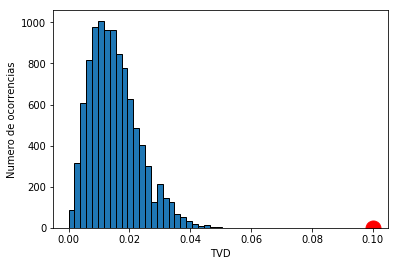

In [33]:
N = 1000 # Tamanho da amostra utilizada pela entrevista
tvd_values = []
pop = np.array([2000, 8000, 2500])/12500

for i in range(0, 10000):
    tvd_values.append(tvd(pop, gera_amostra(N)))
    
plt.hist(tvd_values, bins=30, edgecolor='k')
plt.plot([q1c()], [0], 'ro', ms=15)
plt.xlabel('TVD')
plt.ylabel('Numero de ocorrencias')
plt.show()

F) Escreva uma função que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de 90% de confiança

In [34]:
def q1f():
    return np.percentile(tvd_values, 90)

# Exercício 02:

Usando os dados do arquivo ```baby.csv```, vamos realizar um teste por permutação.

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,3.401940,284,27,1.5748,2.834950,False
1,3.203493,282,33,1.6256,3.827183,False
2,3.628736,279,28,1.6256,3.260193,True
3,3.061746,282,23,1.7018,3.543687,True
4,3.855532,286,25,1.5748,2.636503,False


A) Implemente uma função que retorne a diferença entre a média dos pesos dos bebês para as mães fumantes e a média para as mães não fumantes. Exemplo:

```python
def q2a(df):
    media_fumantes = 3.1
    media_nao_fumantes = 3.8
    return -0.7
```

In [39]:
def q2a(df):
    # Define a media dos pesos para as maes fumantes
    smoker = df[df['Maternal Smoker'] == True]
    smoker = smoker['Birth Weight']
    # Define a media dos pesos para as maes nao fumantes
    non_smoker = df[df['Maternal Smoker'] == False]
    non_smoker = non_smoker['Birth Weight']
    # Retorna a diferenca
    return(smoker.mean() - non_smoker.mean())

B) Realize permutações com os rótulos (mães fumantes / não fumantes), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias de peso dos bebês, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

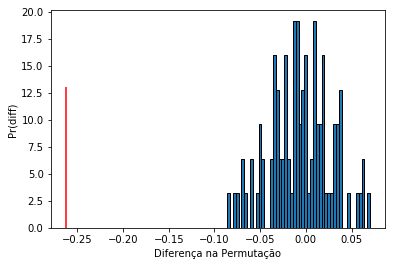

In [40]:
from IPython.display import Image
Image('100permutacoes.png')

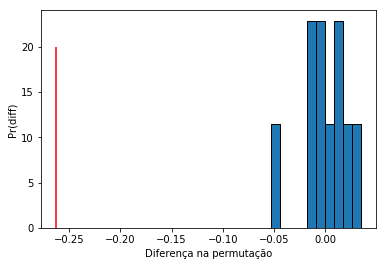

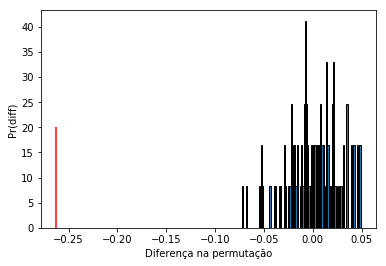

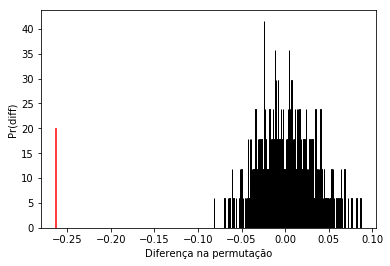

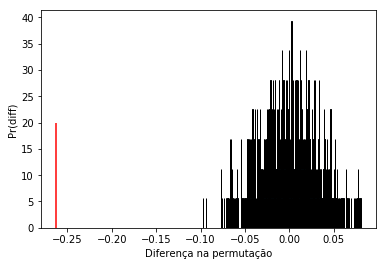

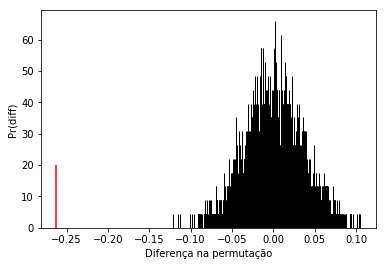

In [41]:
N = [10,100,500,1000,5000]
t_obs = q2a(df)

# Promove a permutacao por meio da randomizacao dos valores de 'values'
def permutation (df, N):
    n_diff = []
    values = df['Maternal Smoker'].values
    for i in range(N):
        np.random.shuffle(values)
        n_diff.append(q2a(df))
    return n_diff

# Faz testes para diferentes tamanho de permutacao
for i in range(5):
    n_diff = permutation (df, N[i])
    plt.hist(n_diff, bins=N[i], density=True, edgecolor='k')
    plt.xlabel('Diferença na permutação')
    plt.ylabel('Pr(diff)')
    plt.vlines(t_obs, 0, 20, color='red')
    plt.show()

B) Escreva abaixo o que você observou com os gráficos.

O que pude observar por meio dos graficos foi que com o aumento do numero de permutacoes eles tendem cada vez mais para a forma de uma normal, onde a media visualmente eh zero. Ademais, temos que, com a observacao dos graficos obtidos, o fato de uma mae fumar ou nao possui grande probabilidade de estar relacionada com o peso do seu bebe.